In this lab, we'll load a dataset and estimate its survival function using K-M.

Let's load a dataset about how long politicians stay in power.

We'll then examine the effect the type of government (dictatorship, democracy, etc.) has on this duration.



In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import lifelines

data = lifelines.datasets.load_dd()

In [48]:
data.head()

,ctryname,cowcode2,politycode,un_region_name,un_continent_name,ehead,leaderspellreg,democracy,regime,start_year,duration,observed
0,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1946.1952.Mona...,Non-democracy,Monarchy,1946,7,1
1,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1953.1962.Ci...,Non-democracy,Civilian Dict,1953,10,1
2,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1963.1972.Mona...,Non-democracy,Monarchy,1963,10,1
3,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1973.1977.Ci...,Non-democracy,Civilian Dict,1973,5,0
4,Afghanistan,700,700.0,Southern Asia,Asia,Nur Mohammad Taraki,Nur Mohammad Taraki.Afghanistan.1978.1978.Civi...,Non-democracy,Civilian Dict,1978,1,0


In [46]:
(data[data["ctryname"] == "United States of America"]).head()

,ctryname,cowcode2,politycode,un_region_name,un_continent_name,ehead,leaderspellreg,democracy,regime,start_year,duration,observed
1713,United States of America,2,2.0,Northern America,Americas,Harry Truman,Harry Truman.United States of America.1946.195...,Democracy,Presidential Dem,1946,7,1
1714,United States of America,2,2.0,Northern America,Americas,Dwight D. Eisenhower,Dwight D. Eisenhower.United States of America....,Democracy,Presidential Dem,1953,8,1
1715,United States of America,2,2.0,Northern America,Americas,John Kennedy,John Kennedy.United States of America.1961.196...,Democracy,Presidential Dem,1961,2,0
1716,United States of America,2,2.0,Northern America,Americas,Lyndon Johnson,Lyndon Johnson.United States of America.1963.1...,Democracy,Presidential Dem,1963,6,1
1717,United States of America,2,2.0,Northern America,Americas,Richard Nixon,Richard Nixon.United States of America.1969.19...,Democracy,Presidential Dem,1969,5,1


What proportion of our data is censored (i.e. the politician has not yet left office)?

Now, we'll plot the aggregate survival function. We do this by estimating with Kaplan-Meier.

In [20]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

In [21]:
T = data["duration"]
C = data["observed"]

kmf.fit(T, event_observed=C )

<lifelines.KaplanMeierFitter: fitted with 1808 observations, 340 censored>

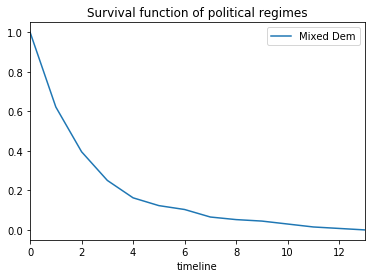

In [53]:
kmf.survival_function_.plot()
plt.title('Survival function of political regimes');

Intepret this plot: what proportion of politicians are in power after 0 years? After 6?

We can use our estimator to plot confidence intervals:

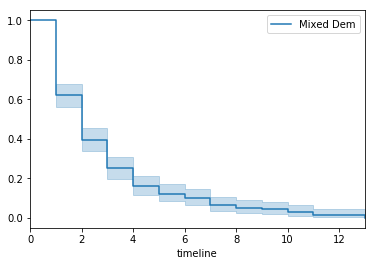

In [54]:
kmf.plot()

And, we can query our model for the median survival time:

In [55]:
kmf.median_

2.0

Intepret this value. What does this median value actually mean?

Now we'll get into more interesting analysis.

The following plot shows two different survival curves, based on whether or not they are in a democratic government.

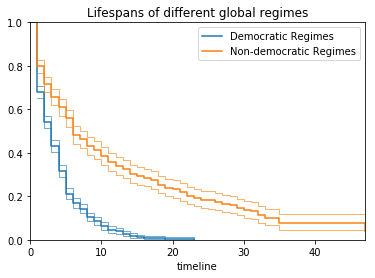

In [25]:
ax = plt.subplot(111)

dem = (data["democracy"] == "Democracy")
kmf.fit(T[dem], event_observed=C[dem], label="Democratic Regimes")
kmf.plot(ax=ax, ci_force_lines=True)
kmf.fit(T[~dem], event_observed=C[~dem], label="Non-democratic Regimes")
kmf.plot(ax=ax, ci_force_lines=True)

plt.ylim(0,1);
plt.title("Lifespans of different global regimes");

What is the median survival time of a politician in a democratic country? In a non-democratic one?

In plain English, conjecture why those values are the way they are (i.e. what is happening in the real world that would make this true).

Now we'll plot the survival function for all the types of regimes:

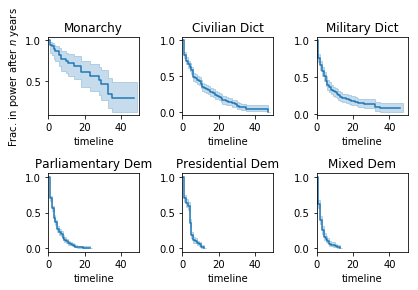

In [28]:
regime_types = data['regime'].unique()

for i,regime_type in enumerate(regime_types):
    ax = plt.subplot(2,3,i+1)
    ix = data['regime'] == regime_type
    kmf.fit( T[ix], C[ix], label=regime_type )
    kmf.plot(ax=ax, legend=False)
    plt.title(regime_type)
    plt.xlim(0,50)
    if i==0:
        plt.ylabel('Frac. in power after $n$ years')
plt.tight_layout()

For each regime type, what is the median number of years in power? (Calculate it.)

Now, we'll use the Nelson-Aelen method to estimate the hazard function:

In [29]:
T = data["duration"]
C = data["observed"]

from lifelines import NelsonAalenFitter
naf = NelsonAalenFitter()

naf.fit(T,event_observed=C)

<lifelines.NelsonAalenFitter: fitted with 1808 observations, 340 censored>

          NA_estimate
timeline             
0.0          0.000000
1.0          0.325912
2.0          0.507356
3.0          0.671251
4.0          0.869867


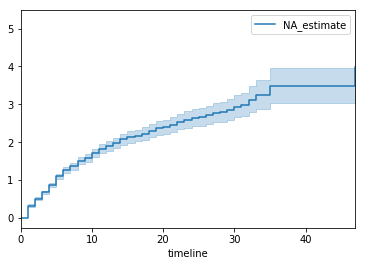

In [31]:
print(naf.cumulative_hazard_.head())
naf.plot()

Intepret this plot. What does the cumulative hazard mean in terms of years in office?

Now, we'll go back to our democratic vs non-democratic separation, and plot their cumulative hazard functions:

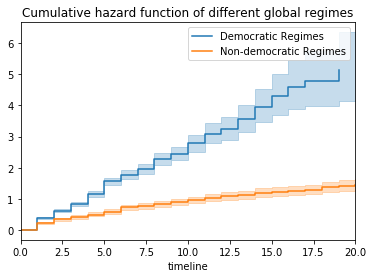

In [58]:
naf.fit(T[dem], event_observed=C[dem], label="Democratic Regimes")
ax = naf.plot(loc=slice(0,20))
naf.fit(T[~dem], event_observed=C[~dem], label="Non-democratic Regimes")
naf.plot(ax=ax, loc=slice(0,20))
plt.title("Cumulative hazard function of different global regimes");

What can you say about the type of regime and how long a politician stays in power?

Do this same analysis for all regime-types.

Bonus: re-implement K-M yourself.